# Complejidad y Compresión

42424242424242

67139066325478

El segundo es mas complejo que el primero, pues al primero se lo puede identificar con un patrón

## Complejidad de Kolmogorov (Solomonoff/ Chaitin)

K(S): Es el tamanio del programa mas chico que genera S.

$ K(s) >= 0 $

$ K(s) <= |s| $

$ K(st) >= K(s) $

$ K(st) >= K(t)$

$ K(st) <= K(s) + K(t) $

$ K(ss) = K(s) $
 
### Distancia de Kolmogorov (KD)

$ KD(s,t) = K(st) - min\{ K(s), K(t) \} $

$ KD(s,t) = \frac{K(st) - min\{K(s), K(t) \}}{max\{K(s),K(t)\}} $

### Teorema de Kolmogorov
K(X) es incomputable 

Hacemos un programa que genere todos los archivos 
``` 
for i = 1 to inf
    for j = 0 to 2^i - 1
        if K(j) >= 200mb:
            print(j)
            quit()
``` 

Suponemos que existe K(X). Esto es absurdo, pues el programa de arriba genera una string X de complejidad de 200mb, y el programa per se no tiene 200mb.

**IDEA: aproximar K(x)**

La mejor aproximacion es C(X)

    C: Es el mejor compresor posible para X.
$ NCD(x,y) = \frac{C(xy)-min\{C(x),C(y)\}}{max\{C(x),C(y)\}}$

## Strings Aleatorios
Un string es aleatorio si K(S) = |S|

La aproximación es  C(S) = |S|. Es decir, se considera que un String es aleatorio si no se puede comprimir.

=========================
## Compresion de Datos
"Es un problema de IA"

Existen 2 pasos.
+ 1. Un primer paso es modelar (encontrar la representacion mas compacta posible para el archivo de forma abstracta). 
+ 2. Un segundo paso es representar el archivo en su forma comprimida.

### Tecnicas de compresión
$\rightarrow$ Compresion Estadistica $\rightarrow$ Huffman $\rightarrow$ C. Aritmetica $\rightarrow$ PPM

$\rightarrow$ Compresion x repeticion $\rightarrow$ LZxx $\rightarrow$ LZMA

$\rightarrow$ Block-Sorting $\rightarrow$ BZip.

$\rightarrow$ Modelos Mixtos $\rightarrow$ PAQ


### Compresión estadística
"ABAACDAABEF"

Se calcula una estadistica de cuantas veces aparece cada byte. Por ejemplo

A $\rightarrow$ 5 P(A) = 5/11

B $\rightarrow$ 2 P(B) = 2/11

C $\rightarrow$ 1 P(C) = 1/11

D $\rightarrow$ 1 P(D) = 1/11

E $\rightarrow$ 1 P(E) = 1/11

F $\rightarrow$ 1 P(F) = 1/11

La idea es que, a los bytes que aparecen de forma mas frecuente, se les asigne una forma de representación mas corta.

##### Entropia
Se define como la cantidad de bits por byte. En el peor de los casos es 8

$H = \sum_{i=1}^{n} P(Ci) * L_{opt}(Ci)$

$H = - \sum P(Ci)*log_{2}(P(Ci))$

$L_{opt}(Ci) = -log_{2}(P(Ci))$

#### Algoritmo de Huffman
Se ponen los caracteres y sus frecuencias (nada ya lo sabemos).

El problema de Huffman es que esta obligado a generar codigos para cada caracter que tienen una cantidad entera de bits.

#### Compresion Aritmetica
La idea es aproximar bien la longitud ideal para cada caracter (que es la indicada por la entropia).

Tomamos un intervalo de 0 a 1, y lo particionamos de forma proporcional a la probabilidad de los caracteres. 

Para cada uno de estos intervalos, 

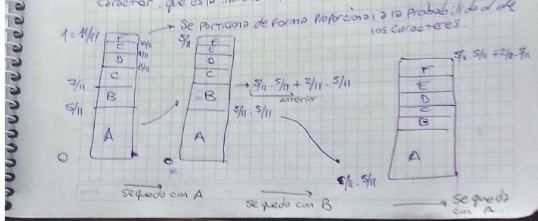

se va mapeando el tamanio de la tabla, siguiendo la cadena de caracteres. Al llegar al final, se toma un numero cualquiera del intervalo final. 

Para descomprimir, se agarra el numero final y se vafijando en que parte del intervalo va cayendo, a partir de la tabla de frecuencias.

#### Modelos de Orden Superior
(Modelo de orden 1). 

Se calculan las probabilidades de los caracteres, dado que se sabe el caracter anterior.

Se mejoran las tablas de probabilidades. No se usan modelos de orden muy grande debido a que las tablas de frecuencia se vuelven demasiado  grandes.

#### PPM - Durilca
Es uno de los metodos que mas comprime. Utiliza varios modelos de diferentes ordenes en forma simultánea.

### Compresion por Repeticiones
" Hola que tal este es un texto hola, parrafo... "

Busco cosas (como palabras o subcadenas) que se repitan, para reemplazar las repeticiones por punteros a sus primeras apariciones. 

Esto da origen a la familia LZ (Lempel - Ziv) 

#### LZ77

Vamos a tener un flag(bit) que puede ser 0, o 1.

0 = No hubo match. El siguiente es un literal (el caracter en 8 bits)

1 = Hubo un match. A continuacion viene una longitud (en n bits) y una posicion (en n bits).

La posicion me dice cuantas posiciones hacia atras, y la longitud me dice cuantos caracteres copiar.

Por ejemplo 0h0o0l0a...... 1 $(5,29)$.

Para descomprimir se recorre el archivo comprimido y se va volcando los caracteres en la salida. Cuando aparece un 1, simplemente se reemplaza por la cantidad de caracteres a copiar, tomados en la cantidad de posiciones indicadas detras del puntero. SON MUY RAPIDOS DE DESCOMPRIMIR. PERO MUY EH.

#### LZ78

Se plantea una tabla con posiciones de 0 a 511. Las primeras 256 posiciones se llenan con todos los posibles bytes. Va guardando repeticiones de subcadenas en las 256 posiciones superiores de la tabla. Para comprimir, va reemplazando cada caracter por su posicion en la tabla (incluidas repeticiones que puedan encontrarse en las 256 posiciones superiores). En cada paso, se agrega un caracter a la ultima subcadena leida y se la agrega a la tabla.

#### LZ + Huffman = DEFLATE
Deflate es un LZ77 al cual se le aplica un huffman, considerando los literales y las longitudes de las repeticiones. El archivo comprimido se escribe utilizando los codigos prefijos del codigo de huffman y la cantidad de posiciones que se debe retroceder en caso de las longitudes de la repetición. De esa forma, cuando se descomprime utilizando el arbol generado por Huffman, cuando se llega a una longitud de repetición, los siguientes bits representan la cantidad de posiciones que debe retroceder para hallar. 

#### La curva de Pareto o Frontera de Pareto es la curva definida , en un grafico de Compresion vs Tiempo, por aquellos que minimizan el tiempo para la mayor compresion posible. 



### Block Sorting 

ABACAB | DCDC $\leftarrow$ Archivo localizado (hay ciertas zonas del archivo donde predominan ciertos caracteres)

Si el archivo esta localizado, hay un pre-proceso MTF (Move To Front), que facilita luego la compresión estadística.

La idea es la siguiente: Tenemos un vector con todos los 256 bytes posibles \[A B C D \]

A -> 0  (pos en el vector)

B -> 1 (y lo muevo hacia adelante en el vector. El vector queda \[B A ...\]

A -> 1 (repito. El vector queda \[A B ...\]

C -> 2 \[C A B....\]

A -> 1 \[A C B D ...\]

B -> 2 \[B A C D ... \]

D -> 3 \[D B A C ... \]

C -> 3 \[ C D B A .. \]

D -> 1 \[D C B A ... \]

C -> 1 \[C D B A .. \]

Si a este ultimo vector le aplico un compresor estadístico. 

Se descomprime repitiendo el mismo proceso. 

### Burrows - Wheeler: Transformación de Burrows y Wheeler

ALIBABA

LIBABAA

IBABAAL

BABAALI

ABAALIB

BAALIBA

AALIBAB

A esta matriz, la ordenamos alfabeticamente

AALIBAB 0

ABAALIB 1

ALIBABA 2

BAALIBA 3

BABAALI 4

IBABAAL 5

LIBABAA 6

El resultado es la ultima columna y un numero que indica cual de todas las rotaciones era el string original.

Resultado = BBAAILA + 2

BZIP aplica esta transformacion, luego aplica Move to Front, y por ultimo Huffman.

Para volver, se ordena y se le asigna los indices en la columna final, y eso se cruza con la ultima columna en el orden que quedo, onda

AAABBIL

2360145

==========

0123456

bbaaila

2360145


### PAQ
Gana la mayoria de las competencias de compresión.

La idea es combinar varios modelos de compresion diferentes. Comprime bit x bit. El resultado final es un aritmetico que termina solo con 0 y 1. 